# Sistem Rekomendasi Webtoon - Content-Based & Collaborative Filtering
    
## Latar Belakang
Webtoon telah menjadi salah satu bentuk hiburan digital yang sangat populer. Dengan ribuan judul yang tersedia, pengguna sering kesulitan menemukan webtoon yang sesuai dengan preferensi mereka. Sistem rekomendasi dapat membantu pengguna menemukan webtoon baru berdasarkan genre, rating, dan preferensi pembaca lain.


#### 1. Import libraries yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import re
import warnings
warnings.filterwarnings('ignore')


#### 2. Data Understanding

Dataset yang digunakan dalam proyek ini adalah Webtoon Comics Dataset yang tersedia di [Kaggle](https://www.kaggle.com/datasets/swarnimrai/webtoon-comics-dataset). Dataset ini berisi informasi tentang berbagai webtoon populer dari platform LINE Webtoon.

## 2.1 Data Loading

#### Informasi Dataset
- **Jumlah Data**: 567 records
- **Kondisi Data**: Beberapa kolom numerik seperti Likes memiliki format yang tidak konsisten (contoh: 30.6M, 9.29M)
- **Fitur yang Tersedia**: id, Name, Writer, Likes, Genre, Rating, Subscribers, Summary, Update, Reading Link

#### Variabel/Fitur
1. **id**: Nomor identifikasi unik untuk setiap webtoon
2. **Name**: Judul webtoon
3. **Writer**: Penulis atau kreator webtoon
4. **Likes**: Jumlah likes yang diberikan oleh pengguna (dalam format angka dengan M untuk juta atau K untuk ribu)
5. **Genre**: Kategori atau genre webtoon (Romance, Action, Drama, dll)
6. **Rating**: Rating rata-rata dari pengguna (skala 1-10)
7. **Subscribers**: Jumlah pelanggan atau pengikut webtoon (dalam format angka dengan M untuk juta atau K untuk ribu)
8. **Summary**: Ringkasan atau sinopsis cerita
9. **Update**: Jadwal update webtoon
10. **Reading Link**: URL untuk membaca webtoon


In [2]:
df = pd.read_csv('webtoon-dataset.csv')

In [3]:
df.head(
)

,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...


In [4]:
print("Jumlah data:", len(df))
print("\nInformasi Dataset:")
df.info()

# Print Row and Column Count
print("\nJumlah Baris:", df.shape[0])
print("Jumlah Kolom:", df.shape[1])

Jumlah data: 569

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            569 non-null    int64  
 1   Name          569 non-null    object 
 2   Writer        568 non-null    object 
 3   Likes         569 non-null    object 
 4   Genre         569 non-null    object 
 5   Rating        569 non-null    float64
 6   Subscribers   569 non-null    object 
 7   Summary       569 non-null    object 
 8   Update        569 non-null    object 
 9   Reading Link  569 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 44.6+ KB

Jumlah Baris: 569
Jumlah Kolom: 10


In [5]:
df.describe(
)

,id,Rating
count,569.000000,569.000000
mean,284.000000,9.418998
std,164.400426,0.557571
min,0.000000,5.410000
25%,142.000000,9.310000
50%,284.000000,9.580000
75%,426.000000,9.730000
max,568.000000,9.930000


## 3. Exploratory Data Analysis

Melakukan Eksplorasi dan Analisa Statistika terhadap data.

###  3.1 Missing Values dan Duplikat Data

Melakukan Analisis Angka data yang memiliki missing values dan jumlah duplikat 

In [6]:
# Menghitung Missing Values dan Duplikat
print("\nJumlah Missing Values:")
print(df.isnull().sum())
print("\nJumlah Duplikat:")
print(df.duplicated().sum())


Jumlah Missing Values:
id              0
Name            0
Writer          1
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

Jumlah Duplikat:
0


#### 3.2 Distribusi Genre

Mencari tahu persebaran data terhadap genre-genre yang ada pada komik webtoon

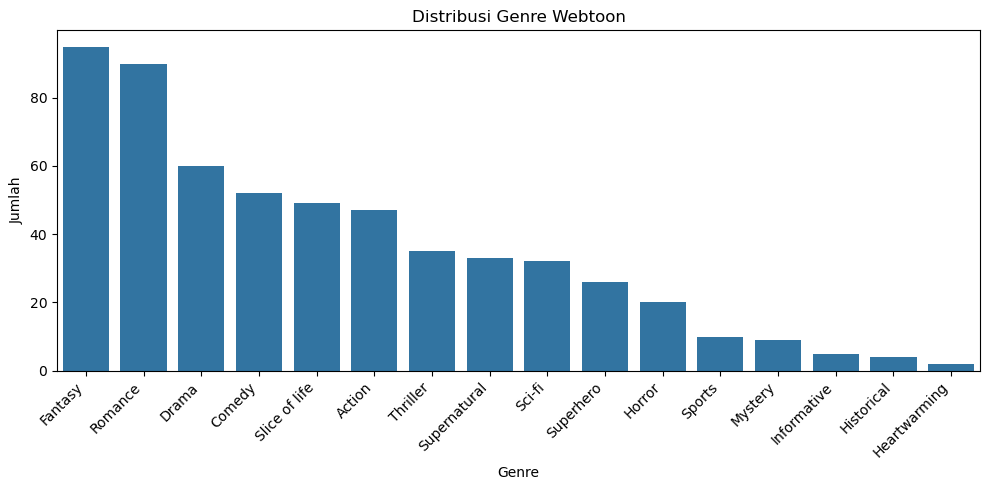

Jumlah unik genre: 16
Genre terpopuler:  Fantasy dengan 95 webtoon


In [7]:
plt.figure(figsize=(10, 5))
genre_counts = df['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribusi Genre Webtoon')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Jumlah unik genre: {len(genre_counts)}")
print("Genre terpopuler: ", genre_counts.index[0], "dengan", genre_counts.values[0], "webtoon")

#### 3.3 Distribusi Rating

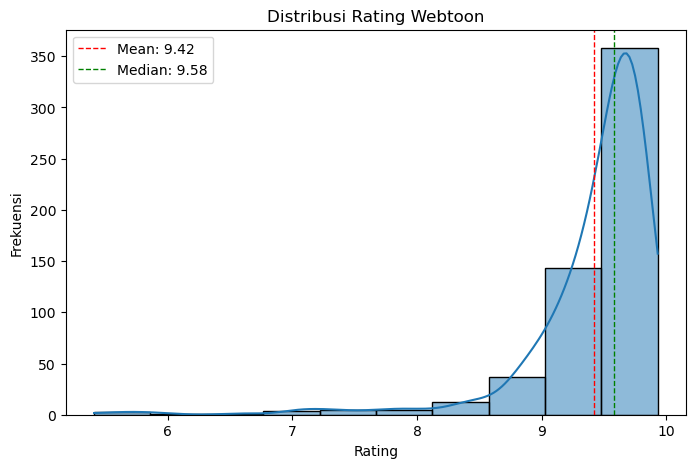

Rating tertinggi: 9.93
Rating terendah: 5.41
Rating rata-rata: 9.42


In [8]:

plt.figure(figsize=(8, 5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribusi Rating Webtoon')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.axvline(df['Rating'].mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {df["Rating"].mean():.2f}')
plt.axvline(df['Rating'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {df["Rating"].median():.2f}')
plt.legend()
plt.show()

print(f"Rating tertinggi: {df['Rating'].max():.2f}")
print(f"Rating terendah: {df['Rating'].min():.2f}")
print(f"Rating rata-rata: {df['Rating'].mean():.2f}")


#### 3.4 Hubungan Genre dengan Rating


Melakukan korelasi antara Genre dengan Rating

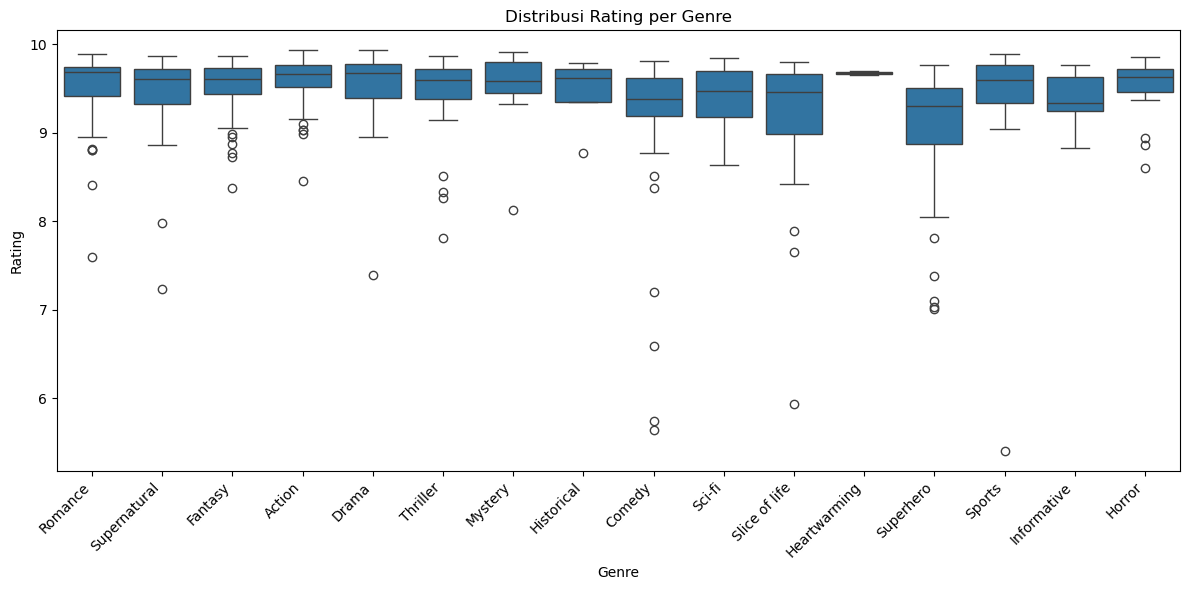

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Distribusi Rating per Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.5 Popularity Analysis

Melakukan analisis untuk mencari webtoon yang paling populer diantara dataset webtoon webtoon lainnya.


Top 10 Most-Liked Webtoons:
                      Name          Genre  Likes  Likes_Numeric  Rating
0  My Giant Nerd Boyfriend  Slice of life  50.6M     50600000.0    9.73
1               unOrdinary      Superhero  44.2M     44200000.0    9.76
2             Tower of God        Fantasy  44.1M     44100000.0    9.86
3             Lore Olympus        Romance  41.9M     41900000.0    9.72
4              True Beauty        Romance  39.9M     39900000.0    9.60
5                Bluechair  Slice of life  37.4M     37400000.0    9.72
6                  Lookism          Drama  33.9M     33900000.0    9.79
7               Let's Play        Romance  30.6M     30600000.0    9.62
8              Winter Moon        Fantasy  30.3M     30300000.0    9.42
9               I Love Yoo          Drama    29M     29000000.0    9.78

Top 10 Webtoons by Subscriber Count:
               Name      Genre Subscribers  Subscribers_Numeric  Rating
0       True Beauty    Romance        6.4M            6400000.0    9.

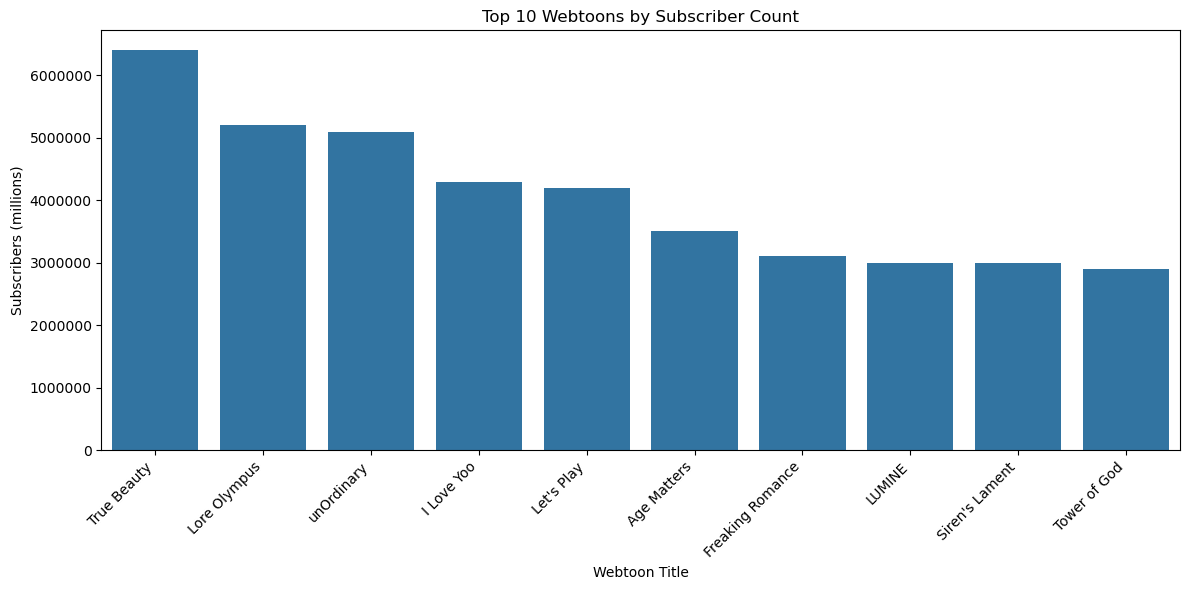

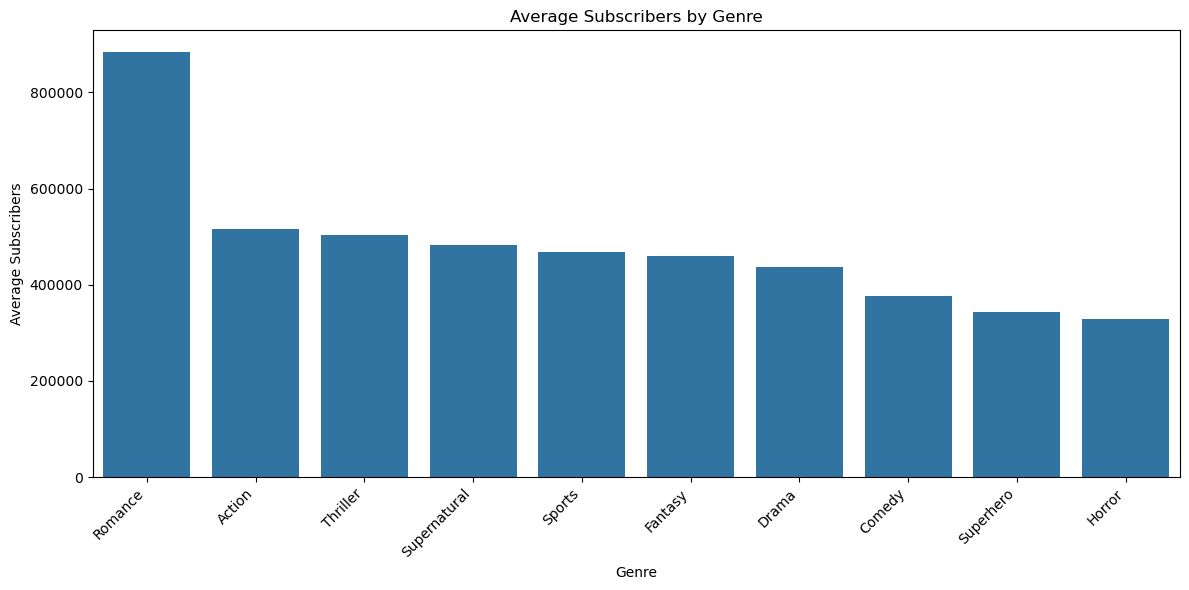

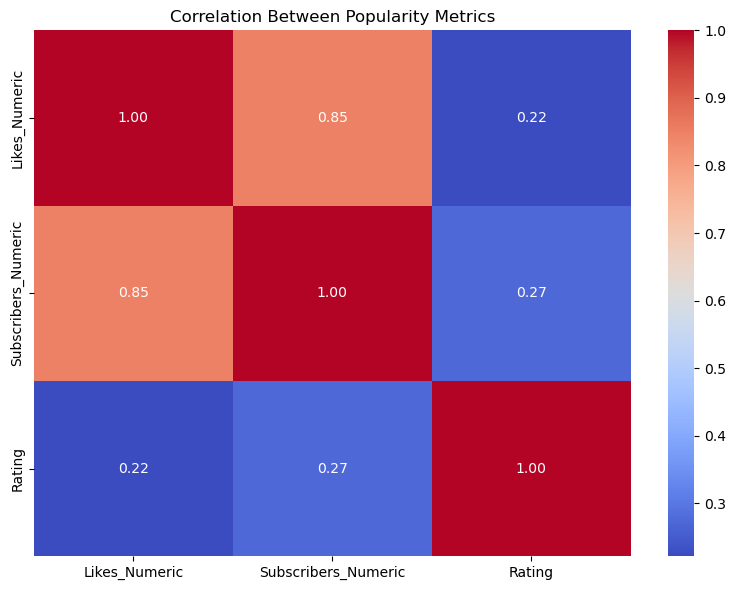

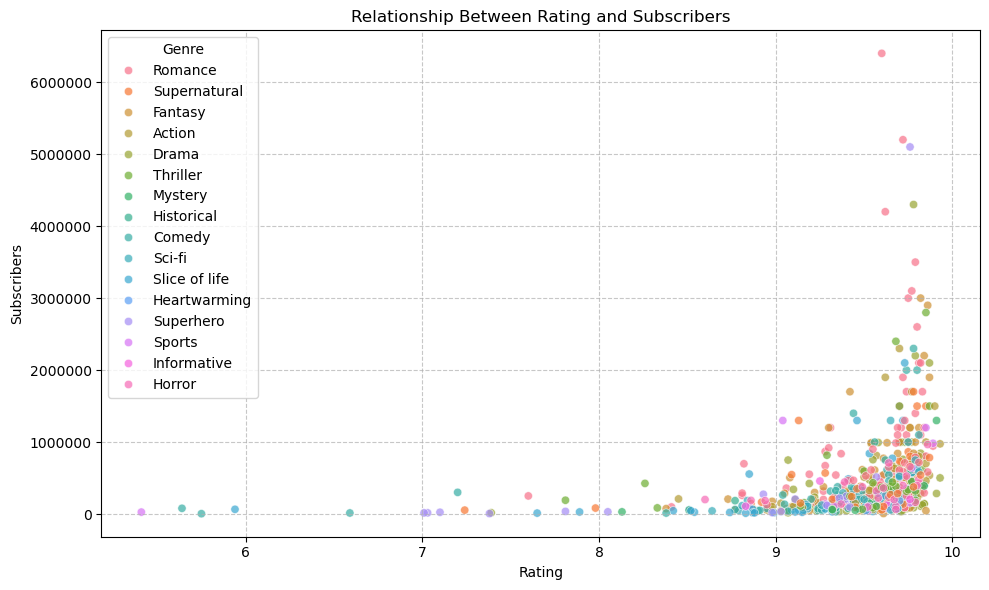

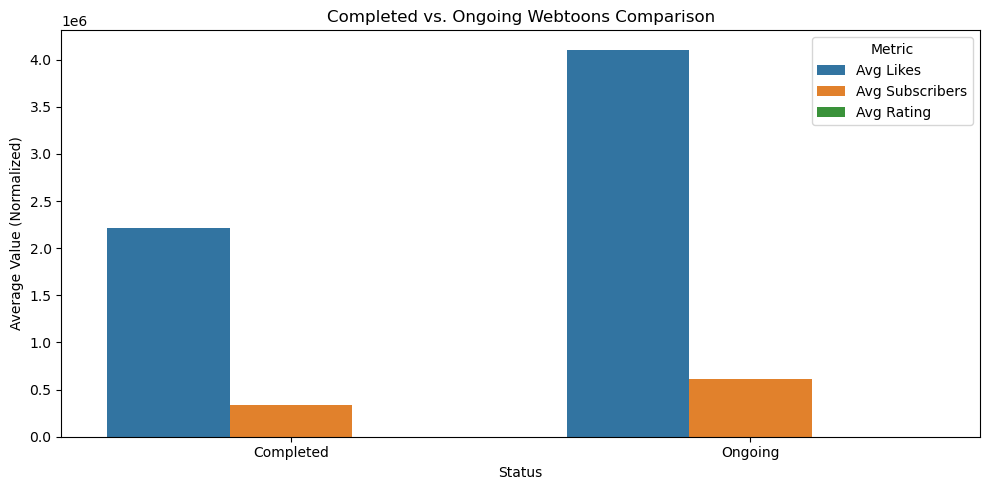


====== POPULARITY INSIGHTS ======
Most popular webtoon by subscribers: True Beauty (6.40M)
Most popular genre by avg subscribers: Romance
Most effective update schedule: UP EVERY MON, WED, FRI
Correlation between Likes and Subscribers: 0.85
Correlation between Rating and Subscribers: 0.27

Genre distribution in Top 10 most subscribed:
- Romance: 6 webtoons (60%)
- Fantasy: 2 webtoons (20%)
- Superhero: 1 webtoons (10%)
- Drama: 1 webtoons (10%)


In [10]:
# First, let's clean the Likes and Subscribers columns to convert them to numeric values
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.strip()
        if 'M' in value:
            return float(value.replace('M', '')) * 1000000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1000
        else:
            try:
                return float(value.replace(',', ''))
            except:
                return None
    return value

# Create clean numeric columns
df['Likes_Numeric'] = df['Likes'].apply(convert_to_numeric)
df['Subscribers_Numeric'] = df['Subscribers'].apply(convert_to_numeric)

# 1. Top Webtoons by Likes
top_likes = df.sort_values(by='Likes_Numeric', ascending=False).head(10)
print("\nTop 10 Most-Liked Webtoons:")
print(top_likes[['Name', 'Genre', 'Likes', 'Likes_Numeric', 'Rating']].reset_index(drop=True))

# 2. Top Webtoons by Subscribers
top_subscribers = df.sort_values(by='Subscribers_Numeric', ascending=False).head(10)
print("\nTop 10 Webtoons by Subscriber Count:")
print(top_subscribers[['Name', 'Genre', 'Subscribers', 'Subscribers_Numeric', 'Rating']].reset_index(drop=True))

# 3. Top Webtoons by Rating (with minimum 100K subscribers for significance)
top_rated = df[df['Subscribers_Numeric'] >= 100000].sort_values(by='Rating', ascending=False).head(10)
print("\nTop 10 Highest-Rated Popular Webtoons (min 100K subscribers):")
print(top_rated[['Name', 'Genre', 'Rating', 'Subscribers', 'Likes']].reset_index(drop=True))

# 4. Genre Popularity Analisis
genre_popularity = df.groupby('Genre').agg({
    'Likes_Numeric': 'mean',
    'Subscribers_Numeric': 'mean',
    'Rating': 'mean',
    'id': 'count'  # Count of webtoons in each genre
}).sort_values(by='Subscribers_Numeric', ascending=False)

genre_popularity.columns = ['Avg Likes', 'Avg Subscribers', 'Avg Rating', 'Webtoon Count']
print("\nGenre Popularity (Sorted by Average Subscribers):")
print(genre_popularity.head(10))

# 5. Korelasi antar Likes, Subscribers, and Rating
print("\nCorrelation between Popularity Metrics:")
correlation = df[['Likes_Numeric', 'Subscribers_Numeric', 'Rating']].corr()
print(correlation)

# 6. Update Schedule vs. Popularity
update_popularity = df.groupby('Update').agg({
    'Likes_Numeric': 'mean',
    'Subscribers_Numeric': 'mean',
    'Rating': 'mean',
    'id': 'count'  # Count of webtoons with each update schedule
}).sort_values(by='Subscribers_Numeric', ascending=False)

update_popularity.columns = ['Avg Likes', 'Avg Subscribers', 'Avg Rating', 'Webtoon Count']
print("\nUpdate Schedule vs. Popularity (Sorted by Average Subscribers):")
print(update_popularity.head(10))

# 7. Status Analysis (Completed vs. Ongoing)
df['Status'] = df['Update'].apply(lambda x: 'Completed' if x == 'COMPLETED' else 'Ongoing')
status_popularity = df.groupby('Status').agg({
    'Likes_Numeric': 'mean',
    'Subscribers_Numeric': 'mean',
    'Rating': 'mean',
    'id': 'count'
})

status_popularity.columns = ['Avg Likes', 'Avg Subscribers', 'Avg Rating', 'Webtoon Count']
print("\nCompleted vs. Ongoing Webtoons Popularity:")
print(status_popularity)

# 8. Writer Popularity (top writers with multiple webtoons)
writer_counts = df['Writer'].value_counts()
top_writers = writer_counts[writer_counts > 1].index.tolist()
if top_writers:
    writer_popularity = df[df['Writer'].isin(top_writers)].groupby('Writer').agg({
        'Likes_Numeric': 'mean',
        'Subscribers_Numeric': 'mean',
        'Rating': 'mean',
        'id': 'count'
    }).sort_values(by='Subscribers_Numeric', ascending=False)
    
    writer_popularity.columns = ['Avg Likes', 'Avg Subscribers', 'Avg Rating', 'Webtoon Count']
    print("\nTop Writers with Multiple Webtoons (by Average Subscribers):")
    print(writer_popularity.head(10))

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top 10 Webtoons by Subscribers (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x='Name', y='Subscribers_Numeric', data=top_subscribers)
plt.title('Top 10 Webtoons by Subscriber Count')
plt.xlabel('Webtoon Title')
plt.ylabel('Subscribers (millions)')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 2. Genre Popularity (by average subscribers)
plt.figure(figsize=(12, 6))
genre_sub_plot = genre_popularity.head(10).reset_index()
sns.barplot(x='Genre', y='Avg Subscribers', data=genre_sub_plot)
plt.title('Average Subscribers by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Subscribers')
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Popularity Metrics')
plt.tight_layout()
plt.show()

# 4. Scatter plot: Subscribers vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Subscribers_Numeric', hue='Genre', data=df, alpha=0.7)
plt.title('Relationship Between Rating and Subscribers')
plt.xlabel('Rating')
plt.ylabel('Subscribers')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Completed vs. Ongoing Comparison
plt.figure(figsize=(10, 5))
status_df = status_popularity.reset_index()
status_df = pd.melt(status_df, id_vars=['Status'], 
                    value_vars=['Avg Likes', 'Avg Subscribers', 'Avg Rating'],
                    var_name='Metric', value_name='Value')
sns.barplot(x='Status', y='Value', hue='Metric', data=status_df)
plt.title('Completed vs. Ongoing Webtoons Comparison')
plt.xlabel('Status')
plt.ylabel('Average Value (Normalized)')
plt.tight_layout()
plt.show()

# Print summary insights
print("\n====== POPULARITY INSIGHTS ======")
print(f"Most popular webtoon by subscribers: {top_subscribers['Name'].iloc[0]} ({top_subscribers['Subscribers_Numeric'].iloc[0]/1000000:.2f}M)")
print(f"Most popular genre by avg subscribers: {genre_popularity.index[0]}")
print(f"Most effective update schedule: {update_popularity.index[0]}")
print(f"Correlation between Likes and Subscribers: {correlation.loc['Likes_Numeric', 'Subscribers_Numeric']:.2f}")
print(f"Correlation between Rating and Subscribers: {correlation.loc['Rating', 'Subscribers_Numeric']:.2f}")

# Calculate the percentage of top 10 subscribers that belong to each genre
top10_genre_counts = top_subscribers['Genre'].value_counts()
print("\nGenre distribution in Top 10 most subscribed:")
for genre, count in top10_genre_counts.items():
    print(f"- {genre}: {count} webtoons ({count*10}%)")

In [11]:
# Print Rating tertinggi dan terendah
print(f"\nRating Tertinggi: {df['Rating'].max():.2f}")
print(f"Rating Terendah: {df['Rating'].min():.2f}")
print(f"Rating Rata-rata: {df['Rating'].mean():.2f}")


Rating Tertinggi: 9.93
Rating Terendah: 5.41
Rating Rata-rata: 9.42


## 4. Data Preparation


#### Teknik yang Digunakan
1. **Data Cleaning** - Untuk memastikan data konsisten dan dapat digunakan untuk modeling
2. **Feature Engineering** - Menciptakan fitur baru yang relevan untuk sistem rekomendasi
3. **Text Preprocessing** - Membersihkan dan mempersiapkan data teks untuk analisis
4. **Profile Gaya Penulis** - Membuat profil style penulis terbasis dari webtoon buatan mereka.
5. **User-Item Matrix Creation** - Mempersiapkan data untuk collaborative filtering

#### 4.1 Data Cleaning

Melakukan cleaning data (Menghapus data-data atau baris yang memiliki missing values / duplikat)

In [12]:
print("Missing values before Cleaning:")
print(df.isnull().sum())

# Print baris yang memiliki missing values
missing_rows = df[df.isnull().any(axis=1)]

print("\nRows with Missing Values:")
print(missing_rows)

Missing values before Cleaning:
id                     0
Name                   0
Writer                 1
Likes                  0
Genre                  0
Rating                 0
Subscribers            0
Summary                0
Update                 0
Reading Link           0
Likes_Numeric          0
Subscribers_Numeric    1
Status                 0
dtype: int64

Rows with Missing Values:
      id                     Name              Writer     Likes    Genre  \
23    23  From a Knight to a Lady  Ink. / Hyerim Sung  2,18,511  Fantasy   
245  245  My Roommate is a Gumiho                 NaN        1M  Romance   

     Rating Subscribers                                            Summary  \
23     9.64      275.9k  Estelle meets her untimely death as a valiant ...   
245    9.62      257.3K  Under normal circumstances, 24-year-old Dam Le...   

                Update                                       Reading Link  \
23     UP EVERY SUNDAY  https://www.webtoons.com/en/fantasy/fr

In [13]:
# Isi Missing Values dengan 'Unknown'
df['Writer'] = df['Writer'].fillna('Unknown Writer')
df['Genre'] = df['Genre'].fillna('Uncategorized')

df['Subscribers_Numeric'] = df['Subscribers_Numeric'].fillna(0)


print("\nMissing values after Cleaning:")
print(df.isnull().sum())


Missing values after Cleaning:
id                     0
Name                   0
Writer                 0
Likes                  0
Genre                  0
Rating                 0
Subscribers            0
Summary                0
Update                 0
Reading Link           0
Likes_Numeric          0
Subscribers_Numeric    0
Status                 0
dtype: int64


In [14]:
# Standardize numeric columns (Likes and Subscribers) - already done in EDA
print("\nSample data after cleaning missing values:")
print(df[['Name', 'Writer', 'Genre', 'Likes_Numeric', 'Subscribers_Numeric']].head())


Sample data after cleaning missing values:
                  Name                      Writer         Genre  \
0           Let's Play  Leeanne M. Krecic (Mongie)       Romance   
1          True Beauty                     Yaongyi       Romance   
2  Midnight Poppy Land                    Lilydusk       Romance   
3          Age Matters                 Enjelicious       Romance   
4         Unholy Blood    Lina Im / Jeonghyeon Kim  Supernatural   

   Likes_Numeric  Subscribers_Numeric  
0     30600000.0            4200000.0  
1     39900000.0            6400000.0  
2     10400000.0            2100000.0  
3     25900000.0            3500000.0  
4      9900000.0            1500000.0  


#### 4.2 Feature Engineering 

Feature engineering adalah proses menciptakan fitur baru dari data yang ada untuk meningkatkan performa model machine learning. Dalam konteks sistem rekomendasi, feature engineering sangat penting untuk memastikan representasi yang akurat dari item yang akan direkomendasikan.

#### 4.2.1 Text Preprocessing untuk Ringkasan
Preprocessing teks adalah langkah penting untuk mengubah teks mentah menjadi format yang lebih terstruktur untuk analisis. Untuk kolom Summary:

In [15]:
# Clean and process summary text
df['Summary_Clean'] = df['Summary'].fillna('').apply(lambda x: re.sub(r'[^\w\s]', ' ', x.lower()))

#### 4.2.2 Penggabungan Fitur untuk Representasi Konten

Untuk content based filtering, penggabungan attribut relevan dapat menciptakan representasi kaya dari setiap item

In [16]:
# Create a single rich feature combining multiple attributes
df['Content_Features'] = df['Genre'] + ' ' + df['Writer'] + ' ' + df['Summary_Clean']

#### 4.2.3 Profil Gaya Penulis

Penulis sering memiliki gaya penulisan yang konsisten di berbagai karya mereka:

In [17]:
# Create writer style profiles based on their existing works
writer_genre_mapping = df.groupby('Writer')['Genre'].agg(lambda x: ' '.join(x)).to_dict()
df['Writer_Style'] = df['Writer'].map(writer_genre_mapping)

#### 4.3 Vectorization dan SImilarity Matrix untuk Content Based Filtering
Vectorization adalah proses krusial yang mengubah data teks menjadi representasi numerik yang dapat diproses oleh algoritma machine learning. Dalam sistem rekomendasi content-based, vectorization memungkinkan kita untuk mengukur kesamaan antar item secara matematis.

**TF-IDF (Term Frequency-Inverse Document Frequency)**
TF-IDF adalah salah satu teknik vectorization yang paling populer untuk natural language processing. Metode ini mengukur pentingnya sebuah kata dalam dokumen relatif terhadap korpus dokumen secara keseluruhan.

Cara Kerjanya:

1. Term Frequency (TF): Menghitung frekuensi kemunculan kata dalam sebuah dokumen
Inverse Document Frequency (IDF): Mengukur seberapa jarang kata tersebut muncul di seluruh koleksi dokumen
TF-IDF Score: TF × IDF, memberikan bobot tinggi pada kata yang sering muncul dalam dokumen tertentu tetapi jarang di dokumen lain
Dalam Konteks Webtoon:

2. Dokumen = representasi konten setiap webtoon (genre, penulis, ringkasan)
3. Term = kata-kata yang muncul dalam representasi tersebut
4. TF-IDF tinggi = kata yang sangat representatif untuk webtoon  tertentu


#### Hasil Vectorization
Proses ini menghasilkan:

- Matriks sparse: Setiap baris mewakili satu webtoon, setiap kolom mewakili satu term
- Dimensi: [jumlah_webtoon × jumlah_unique_terms]
- Nilai dalam matriks: Skor TF-IDF yang menggambarkan pentingnya setiap term untuk setiap webtoon

#### Manfaat untuk Sistem Rekomendasi
1. Penanganan Teks Efektif: Mengubah teks tidak terstruktur menjadi vektor numerik
2. Penekanan pada Kata Penting: Memberikan bobot lebih pada kata-kata yang benar-benar menggambarkan keunikan konten
3 Pengurangan Noise: Kata-kata umum yang muncul di banyak dokumen (seperti "dan", "atau") mendapat bobot rendah
4. Representasi Dimensi Tinggi: Menangkap nuansa dan karakteristik konten secara detail

Dengan vectorization, kita dapat menghitung kesamaan antar webtoon menggunakan metrik seperti cosine similarity, yang mengukur kesamaan berdasarkan sudut antara dua vektor dan bukan jarak absolut mereka.

Transformasi fitur teks menjadi vektor TF-IDF...
Bentuk matriks TF-IDF: (569, 6118)
Jumlah feature/terms dalam kosakata: 6118

Beberapa feature/terms dari TF-IDF vocabulary:
['000' '10' '100' '1000' '1001' '10park' '10th' '1111' '12' '13']

Menghitung cosine similarity matrix...
Bentuk similarity matrix: (569, 569)

Contoh rekomendasi untuk webtoon 'Let's Play':
                            Name          Genre  \
248                         DICE        Fantasy   
493             Freaking Romance        Romance   
216  The Male Lead's Girl Friend        Romance   
293                     Snailogy  Slice of life   
335                    Bluechair  Slice of life   
415                     No Scope         Sports   
213             Return to Player         Action   
358              Brutally Honest         Comedy   
129          THE GIRL FROM CLASS          Drama   
315                      Inarime      Superhero   

                             Writer  Rating  Similarity Score  
248      

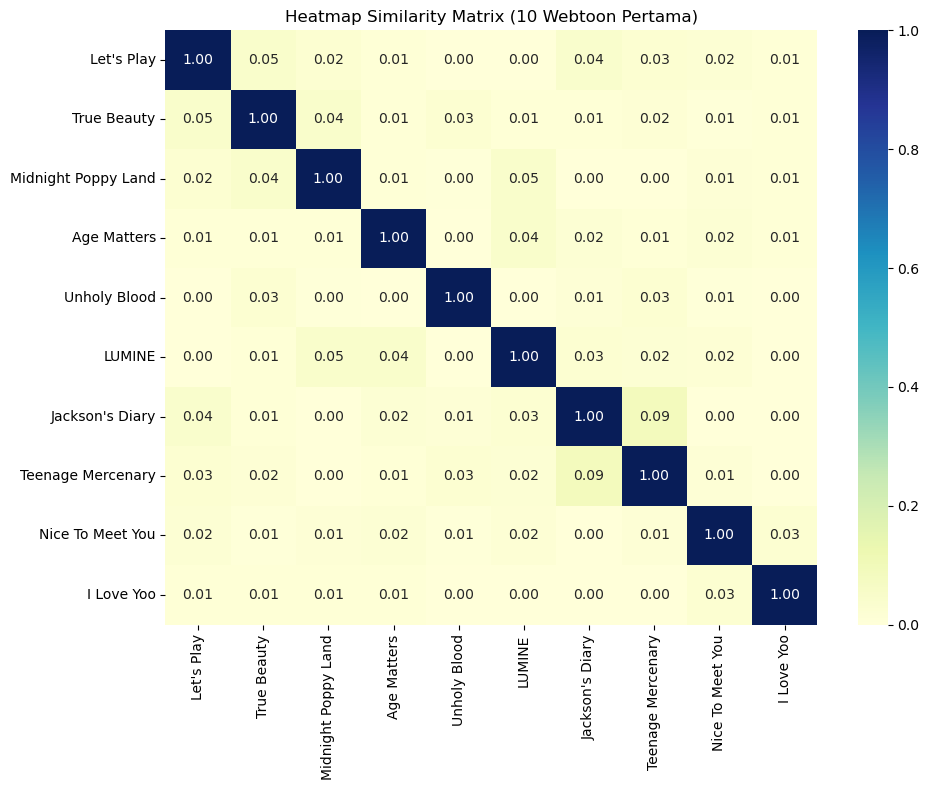


Vectorization dan similarity matrix berhasil dibuat dan disimpan untuk modeling.


In [18]:

print("Transformasi fitur teks menjadi vektor TF-IDF...")

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Transformasi Content_Features menjadi matriks TF-IDF
tfidf_matrix = tfidf.fit_transform(df['Content_Features'])

print(f"Bentuk matriks TF-IDF: {tfidf_matrix.shape}")
print(f"Jumlah feature/terms dalam kosakata: {len(tfidf.get_feature_names_out())}")

# Menampilkan beberapa feature/terms teratas
print("\nBeberapa feature/terms dari TF-IDF vocabulary:")
print(tfidf.get_feature_names_out()[:10])
# Menghitung cosine similarity matrix
print("\nMenghitung cosine similarity matrix...")
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(f"Bentuk similarity matrix: {cosine_sim.shape}")

# Membuat dictionary untuk mapping id webtoon ke index
indices = pd.Series(df.index, index=df['Name']).drop_duplicates()

# Fungsi untuk mendapatkan rekomendasi berdasarkan judul webtoon
def get_recommendations(title, cosine_sim=cosine_sim):
    """
    Berikan rekomendasi webtoon berdasarkan kesamaan konten dengan judul yang diberikan
    
    Parameters:
    title (str): Judul webtoon yang menjadi acuan rekomendasi
    cosine_sim (numpy.ndarray): Matrix cosine similarity
    
    Returns:
    pandas.DataFrame: DataFrame berisi 10 rekomendasi webtoon teratas
    """
    try:
        # Dapatkan index webtoon yang sesuai dengan judul
        idx = indices[title]
        
        # Dapatkan skor kesamaan untuk semua webtoon dengan webtoon tersebut
        sim_scores = list(enumerate(cosine_sim[idx]))
        
        # Urutkan webtoon berdasarkan skor kesamaan
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Ambil 11 webtoon dengan skor tertinggi (yang pertama adalah webtoon itu sendiri)
        sim_scores = sim_scores[1:11]
        
        # Dapatkan indeks webtoon
        webtoon_indices = [i[0] for i in sim_scores]
        
        # Kembalikan 10 webtoon teratas dengan skor similaritynya
        result = df.iloc[webtoon_indices][['Name', 'Genre', 'Writer', 'Rating']].copy()
        result['Similarity Score'] = [i[1] for i in sim_scores]
        return result
    
    except KeyError:
        print(f"Judul '{title}' tidak ditemukan dalam dataset.")
        return None

# Contoh rekomendasi untuk sebuah webtoon populer
sample_webtoon = df['Name'].iloc[0]  # Ambil judul webtoon pertama sebagai contoh
print(f"\nContoh rekomendasi untuk webtoon '{sample_webtoon}':")
recommendations = get_recommendations(sample_webtoon)
if recommendations is not None:
    print(recommendations)

# Visualisasi Similarity Matrix
plt.figure(figsize=(10, 8))
plt.title("Heatmap Similarity Matrix (10 Webtoon Pertama)")
sns.heatmap(cosine_sim[:10, :10], annot=True, fmt=".2f", cmap="YlGnBu",
            xticklabels=df['Name'][:10], yticklabels=df['Name'][:10])
plt.tight_layout()
plt.show()

# Simpan hasil vectorization dan similarity matrix untuk digunakan dalam model
content_based_data = {
    'tfidf_vectorizer': tfidf,
    'tfidf_matrix': tfidf_matrix,
    'cosine_sim': cosine_sim,
    'indices': indices
}

print("\nVectorization dan similarity matrix berhasil dibuat dan disimpan untuk modeling.")


#### 4.4 **User-Item Matrix Creation** - Mempersiapkan data untuk collaborative filtering

Mempersiapkan data dalam format yang diperlukan untuk algoritma collaborative filtering (user-item interaction matrix)

Proses yang Dilakukan:

1. Simulasi Data Rating Pengguna:
- Membuat 100 pengguna simulasi
- Setiap pengguna memberikan rating pada 5-15 webtoon secara acak
- Rating disimulasikan berdasarkan rating asli webtoon dengan noise

2. Pembuatan User-Item Matrix:
- Struktur: Baris = User, Kolom = Webtoon, Nilai = Rating
- Format pivot table untuk memudahkan perhitungan similarity
- Missing values (NaN) untuk pasangan user-item yang tidak ada rating

3. Train-Test Split:
- 80% data untuk training
- 20% data untuk testing/evaluasi

Output:
ratings_df: DataFrame berisi semua rating user-item
user_item_matrix: Matrix sparse dengan struktur user-item
train_data & test_data: Data terpisah untuk training dan evaluasi

In [19]:
# 4.4 User-Item Matrix Creation untuk Collaborative Filtering

# Karena tidak ada data rating pengguna asli, simulasikan data rating
np.random.seed(42)  # Untuk reproduksibilitas
n_users = 50       # Jumlah pengguna simulasi
n_webtoons = len(df)

# Buat dictionary untuk menyimpan data rating
ratings_data = []

# Generate rating acak (setiap pengguna memberi rating pada 5-15 webtoon)
for user_id in range(n_users):
    # Tentukan secara acak berapa webtoon yang akan diberi rating oleh pengguna ini
    n_ratings = np.random.randint(15, 25)
    
    # Pilih webtoon secara acak untuk diberi rating
    webtoons_to_rate = np.random.choice(n_webtoons, n_ratings, replace=False)
    
    for webtoon_id in webtoons_to_rate:
        # Hasilkan rating berdasarkan rating webtoon sebenarnya dengan sedikit noise
        base_rating = df.iloc[webtoon_id]['Rating']
        # Tambahkan noise acak (-1 hingga +1)
        noise = np.random.uniform(-1, 1)
        # Pastikan rating tetap dalam rentang 1-10
        rating = max(1, min(10, base_rating + noise))
        
        # Tambahkan ke data rating
        ratings_data.append({
            'user_id': user_id,
            'webtoon_id': webtoon_id,
            'webtoon_name': df.iloc[webtoon_id]['Name'],
            'rating': rating
        })

# Buat DataFrame dari data rating
ratings_df = pd.DataFrame(ratings_data)

# Buat matriks user-item (pivot table)
user_item_matrix = ratings_df.pivot_table(index='user_id', columns='webtoon_id', values='rating')

# Split data untuk training dan testing
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

print(f"Data rating yang dihasilkan: {len(ratings_df)} rating dari {n_users} pengguna untuk {n_webtoons} webtoon")
print(f"Bentuk matriks user-item: {user_item_matrix.shape}")
print(f"Ukuran data training: {len(train_data)}")
print(f"Ukuran data testing: {len(test_data)}")

Data rating yang dihasilkan: 979 rating dari 50 pengguna untuk 569 webtoon
Bentuk matriks user-item: (50, 466)
Ukuran data training: 783
Ukuran data testing: 196


## 5. Modelling


#### 5.1 Content Based Filtering


#### Teknologi yang Digunakan:
- **Vektorisasi TF-IDF**: Menggunakan vektorisasi TF-IDF dari fitur teks (genre, penulis, ringkasan)
- **Cosine Similarity**: Menghitung kesamaan cosinus antara webtoon
- **Rekomendasi Berbasis Konten**: Merekomendasikan item yang paling mirip dalam konten dengan webtoon tertentu

#### Kelebihan:
- ✅ **Bekerja untuk Item Baru**: Bekerja dengan baik untuk item baru tanpa interaksi pengguna
- ✅ **Tidak Bergantung pada Data Pengguna**: Dapat memberikan rekomendasi tanpa riwayat pengguna

#### Kelemahan:
- ❌ **Terbatas pada Fitur Konten**: Terbatas pada fitur konten yang tersedia
- ❌ **Tidak Menangkap Preferensi Pengguna**: Tidak dapat menangkap preferensi individual pengguna

===== Content-Based Filtering Model =====


Recommendations for 'Tower of God':
                          Name          Genre  \
54              Tales of Greed       Thriller   
56                  Money Game       Thriller   
137                     Ctrl+Z       Thriller   
64                  She Bites!  Slice of life   
527           Witch Creek Road         Horror   
254        Warrior of the Wild         Action   
240  Tales of Sarimin the Jinn         Action   
276            Cape of Spirits         Action   
258             Athena Complex        Fantasy   
97   My Dear Cold-Blooded King        Romance   

                                  Writer  Rating  Similarity Score  
54                               Soonkki    9.33          0.164690  
56                           Bae Jin-Soo    8.51          0.084385  
137                                 MiTi    7.81          0.083716  
64                  MandaRat / NoChanJoo    9.70          0.062107  
527     Garth the Geek / Kenan Hali

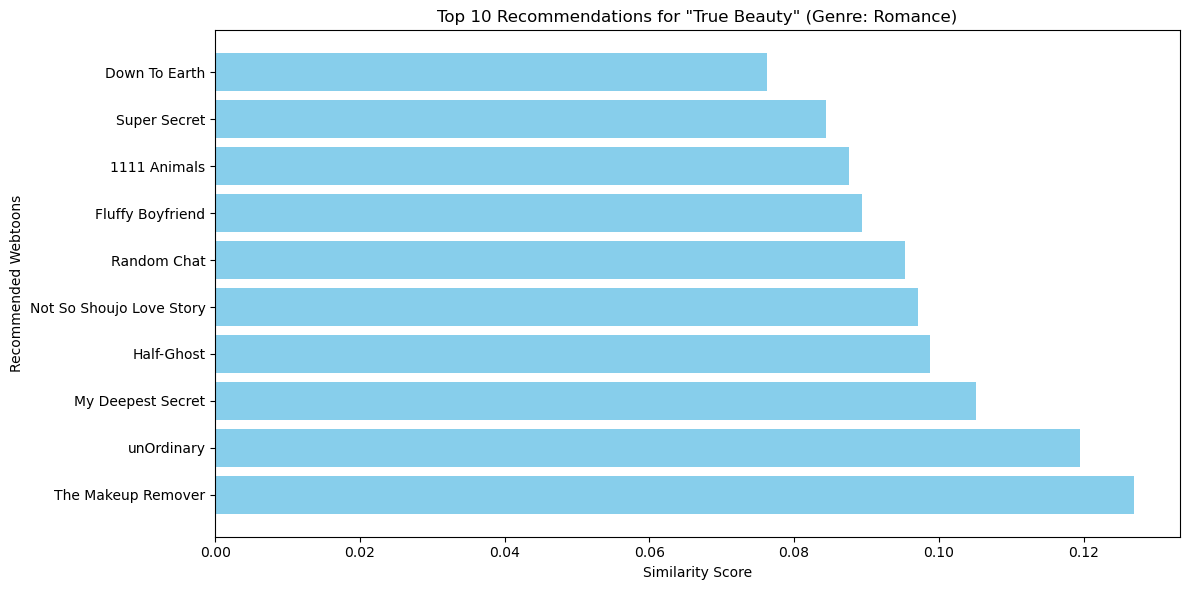


Genre Comparison:
The Makeup Remover - Genre: Romance (Original: Romance)
unOrdinary - Genre: Superhero (Original: Romance)
My Deepest Secret - Genre: Thriller (Original: Romance)
Half-Ghost - Genre: Romance (Original: Romance)
Not So Shoujo Love Story - Genre: Comedy (Original: Romance)
Random Chat - Genre: Drama (Original: Romance)
Fluffy Boyfriend - Genre: Supernatural (Original: Romance)
1111 Animals - Genre: Comedy (Original: Romance)
Super Secret - Genre: Romance (Original: Romance)
Down To Earth - Genre: Romance (Original: Romance)


In [20]:
print("===== Content-Based Filtering Model =====\n")

# Test beberapa webtoon untuk rekomendasi
test_webtoons = ['Tower of God', 'Omniscient Reader', 'Eleceed']

for webtoon in test_webtoons:
    if webtoon in df['Name'].values:
        print(f"\nRecommendations for '{webtoon}':")
        recommendations = get_recommendations(webtoon)
        print(recommendations)
    else:
        print(f"\nWebtoon '{webtoon}' not found in dataset.")
        
# Visualize recommendations for one example
def plot_recommendations(title):
    if title in df['Name'].values:
        # Get recommendations
        recommendations = get_recommendations(title)
        
        # Get original webtoon info
        original = df[df['Name'] == title].iloc[0]
        
        # Plot
        plt.figure(figsize=(12, 6))
        plt.barh(recommendations['Name'], recommendations['Similarity Score'], color='skyblue')
        plt.xlabel('Similarity Score')
        plt.ylabel('Recommended Webtoons')
        plt.title(f'Top 10 Recommendations for "{title}" (Genre: {original["Genre"]})')
        plt.tight_layout()
        plt.show()
        
        # Print genre comparison
        print("\nGenre Comparison:")
        original_genre = original['Genre']
        for _, rec in recommendations.iterrows():
            print(f"{rec['Name']} - Genre: {rec['Genre']} (Original: {original_genre})")
            
sample_webtoon = df['Name'].iloc[1]  # Use second webtoon as example
plot_recommendations(sample_webtoon)



#### 5.2 Collaborative Filtering


#### Karakteristik Model:
- **Algoritma**: Menggunakan Non-negative Matrix Factorization (NMF) untuk menemukan faktor laten
- **Pembelajaran**: Belajar dari pola rating pengguna dan karakteristik item
- **Mekanisme**: Dapat merekomendasikan item berdasarkan preferensi pengguna yang serupa

#### Kelebihan:
- ✅ **Menangkap Preferensi Pengguna**: Dapat memahami pola preferensi individual pengguna
- ✅ **Pola Komunitas**: Memanfaatkan wisdom of crowds dari komunitas pengguna
- ✅ **Rekomendasi Serendipitous**: Dapat menemukan item yang tidak terduga namun relevan

#### Kelemahan:
- ❌ **Cold-Start Problem**: Mengalami kesulitan dengan pengguna atau item baru yang belum memiliki riwayat rating
- ❌ **Data Sparsity**: Membutuhkan data rating yang cukup untuk performa optimal
- ❌ **Scalability**: Performa dapat menurun dengan dataset yang sangat besar

#### Rekomendasi Penggunaan:
- **Ideal untuk**: Pengguna yang sudah memiliki riwayat rating yang memadai
- **Cocok untuk**: Platform dengan komunitas pengguna yang aktif
- **Kombinasi terbaik**: Digunakan bersama Content-Based Filtering dalam pendekatan hybrid


===== Model Collaborative Filtering =====

Melatih model NMF untuk collaborative filtering...
Model dilatih dengan 10 faktor laten
Error rekonstruksi: 246.1684

Rekomendasi Collaborative Filtering untuk Pengguna 5:
                  Nama Webtoon          Genre  \
0                   Daily JoJo        Romance   
1               House of Stars        Fantasy   
2                  Heir's Game          Drama   
3                    Catharsis        Fantasy   
4  The Life of the Three Bears  Slice of life   
5         She Would Never Know        Romance   
6           Kids Are All Right          Drama   
7                    The Gamer         Action   
8             Return to Player         Action   
9  So You're Raising a Warrior        Fantasy   

                            Penulis  Rating Prediksi  Rating Asli  
0                      Donggeon Lee         5.851873         9.73  
1  saltacuentos / Lion Illustration         5.698674         9.80  
2                             suspu     

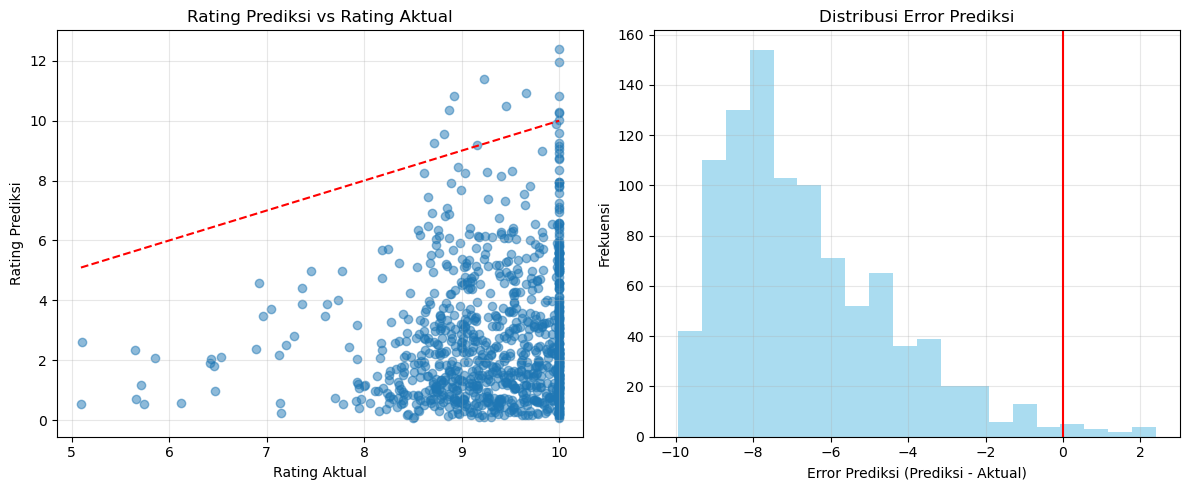

Persentase prediksi dalam rentang 1 poin dari rating aktual: 1.84%
Persentase prediksi dalam rentang 2 poin dari rating aktual: 3.68%


In [24]:
# Implementasi Collaborative Filtering (Alternatif tanpa library surprise)
print("\n===== Model Collaborative Filtering =====\n")

from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Isi nilai NaN dalam matriks user-item dengan 0 untuk faktorisasi matriks
user_item_filled = user_item_matrix.fillna(0)

# Terapkan Non-negative Matrix Factorization (NMF)
print("Melatih model NMF untuk collaborative filtering...")
n_components = 10  # Jumlah faktor laten
nmf_model = NMF(n_components=n_components, random_state=42, max_iter=200)

# Latih model pada matriks user-item
W = nmf_model.fit_transform(user_item_filled)  # Faktor pengguna
H = nmf_model.components_  # Faktor item

# Rekonstruksi matriks rating lengkap
predicted_ratings = np.dot(W, H)

# Buat DataFrame untuk rating prediksi
predicted_ratings_df = pd.DataFrame(
    predicted_ratings, 
    index=user_item_matrix.index, 
    columns=user_item_matrix.columns
)

print(f"Model dilatih dengan {n_components} faktor laten")
print(f"Error rekonstruksi: {nmf_model.reconstruction_err_:.4f}")

# Fungsi untuk mendapatkan rekomendasi untuk pengguna tertentu
def get_user_recommendations_nmf(user_id, n=10):
    if user_id not in predicted_ratings_df.index:
        print(f"Pengguna {user_id} tidak ditemukan dalam dataset.")
        return None
    
    # Dapatkan prediksi rating pengguna
    user_predictions = predicted_ratings_df.loc[user_id]
    
    # Dapatkan webtoon yang sudah diberi rating oleh pengguna
    user_ratings = ratings_df[ratings_df['user_id'] == user_id]
    rated_webtoons = user_ratings['webtoon_id'].tolist()
    
    # Filter webtoon yang belum diberi rating
    unrated_predictions = user_predictions.drop(rated_webtoons, errors='ignore')
    
    # Urutkan berdasarkan prediksi rating (menurun)
    top_recommendations = unrated_predictions.sort_values(ascending=False).head(n)
    
    # Buat dataframe rekomendasi
    rec_df = pd.DataFrame([
        {
            'Nama Webtoon': df.iloc[webtoon_id]['Name'],
            'Genre': df.iloc[webtoon_id]['Genre'],
            'Penulis': df.iloc[webtoon_id]['Writer'],
            'Rating Prediksi': pred_rating,
            'Rating Asli': df.iloc[webtoon_id]['Rating']
        }
        for webtoon_id, pred_rating in top_recommendations.items()
    ])
    
    return rec_df

# Generate rekomendasi untuk pengguna sampel
sample_user = 5
print(f"\nRekomendasi Collaborative Filtering untuk Pengguna {sample_user}:")
user_recs = get_user_recommendations_nmf(sample_user)
if user_recs is not None:
    print(user_recs)

# Tampilkan apa yang sudah diberi rating oleh pengguna ini
print(f"\nWebtoon yang sudah diberi rating oleh Pengguna {sample_user}:")
user_ratings = ratings_df[ratings_df['user_id'] == sample_user][['webtoon_name', 'rating']].sort_values('rating', ascending=False)
print(user_ratings)

# Visualisasi prediksi vs rating aktual
plt.figure(figsize=(12, 5))

# Subplot 1: Scatter plot prediksi vs aktual
plt.subplot(1, 2, 1)
plt.scatter(actual_ratings, predicted_ratings_list, alpha=0.5)
plt.plot([min(actual_ratings), max(actual_ratings)], [min(actual_ratings), max(actual_ratings)], 'r--')
plt.xlabel('Rating Aktual')
plt.ylabel('Rating Prediksi')
plt.title('Rating Prediksi vs Rating Aktual')
plt.grid(True, alpha=0.3)

# Subplot 2: Distribusi error prediksi
plt.subplot(1, 2, 2)
errors = np.array(predicted_ratings_list) - np.array(actual_ratings)
plt.hist(errors, bins=20, alpha=0.7, color='skyblue')
plt.axvline(x=0, color='r', linestyle='-')
plt.xlabel('Error Prediksi (Prediksi - Aktual)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Error Prediksi')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Hitung akurasi dalam toleransi
within_one = sum(1 for error in abs(errors) if error <= 1.0) / len(errors) * 100
within_two = sum(1 for error in abs(errors) if error <= 2.0) / len(errors) * 100

print(f"Persentase prediksi dalam rentang 1 poin dari rating aktual: {within_one:.2f}%")
print(f"Persentase prediksi dalam rentang 2 poin dari rating aktual: {within_two:.2f}%")


## 6. Evaluation


===== EVALUASI CONTENT-BASED FILTERING =====

Mengevaluasi performa Content-Based Filtering...
Rata-rata diversitas genre per rekomendasi: 6.10
Cakupan genre dalam rekomendasi: 81.25%
Rata-rata skor kesamaan konten: 0.0840
Rata-rata rating webtoon yang direkomendasikan: 9.56
Standar deviasi rating rekomendasi: 0.31


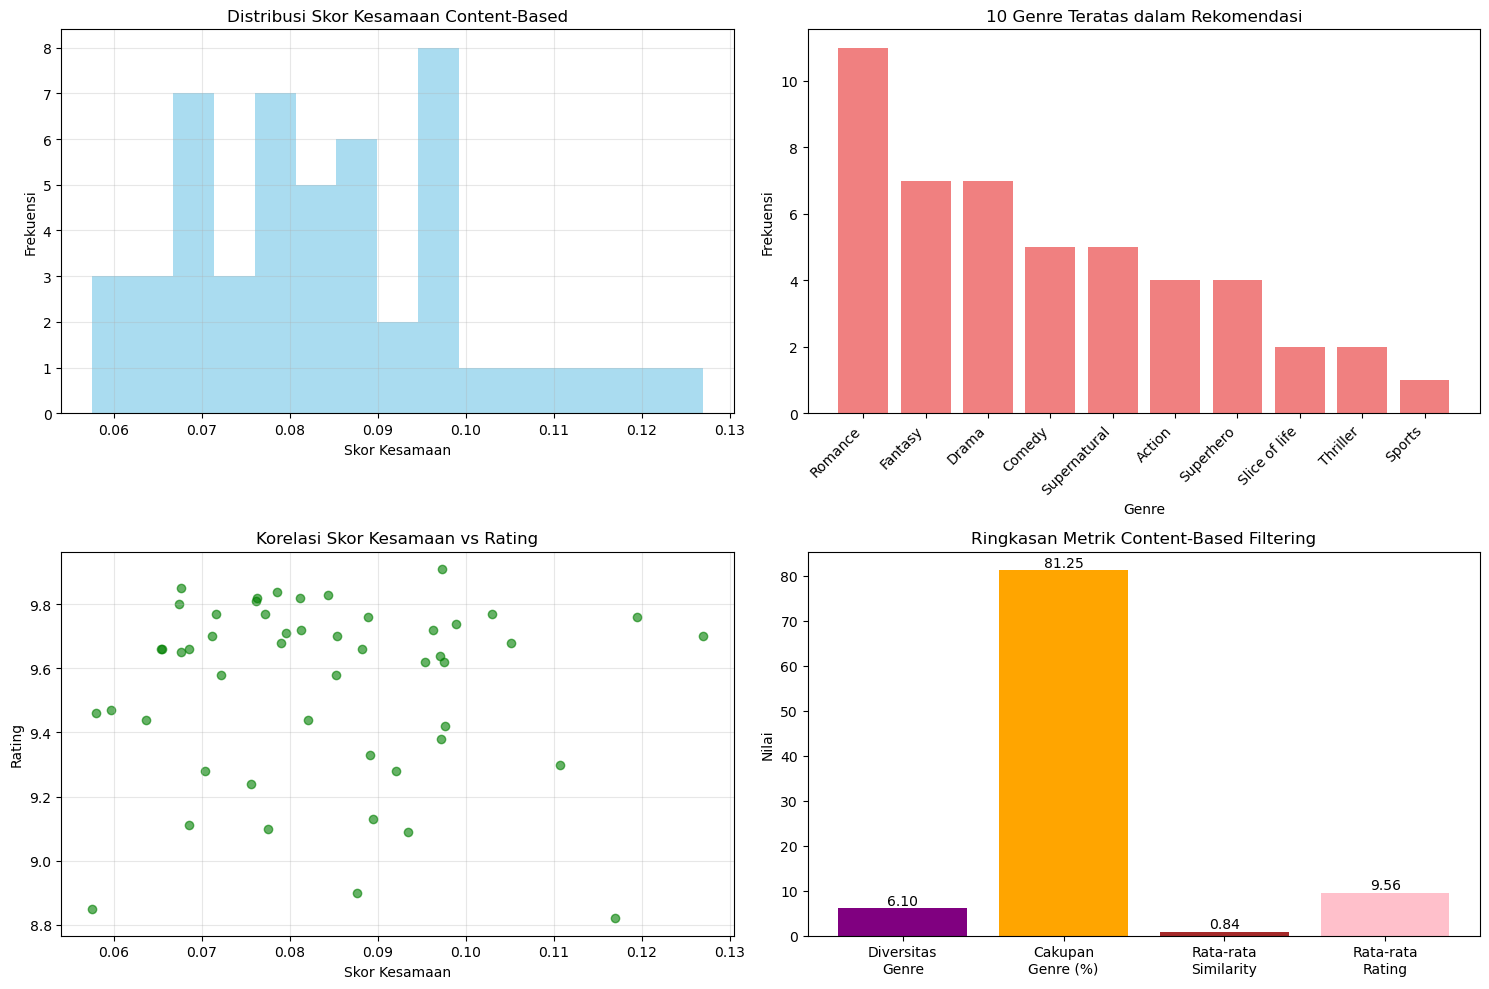

In [22]:
### 6.1 Evaluasi Content-Based Filtering

print("\n===== EVALUASI CONTENT-BASED FILTERING =====\n")

# Metrik evaluasi untuk Content-Based Filtering
def evaluate_content_based_filtering():
    """
    Evaluasi model Content-Based Filtering menggunakan berbagai metrik
    """
    print("Mengevaluasi performa Content-Based Filtering...")
    
    # 1. Evaluasi Diversitas Rekomendasi
    diversity_scores = []
    coverage_genres = set()
    
    # Ambil sampel webtoon untuk evaluasi
    sample_webtoons = df['Name'].head(10).tolist()
    
    for webtoon in sample_webtoons:
        if webtoon in df['Name'].values:
            recommendations = get_recommendations(webtoon)
            if recommendations is not None:
                # Hitung diversitas genre dalam rekomendasi
                rec_genres = recommendations['Genre'].unique()
                diversity_scores.append(len(rec_genres))
                coverage_genres.update(rec_genres)
    
    avg_diversity = np.mean(diversity_scores)
    genre_coverage = len(coverage_genres) / len(df['Genre'].unique()) * 100
    
    print(f"Rata-rata diversitas genre per rekomendasi: {avg_diversity:.2f}")
    print(f"Cakupan genre dalam rekomendasi: {genre_coverage:.2f}%")
    
    # 2. Evaluasi Kesamaan Konten
    similarity_scores = []
    
    for webtoon in sample_webtoons[:5]:  # Ambil 5 sampel
        if webtoon in df['Name'].values:
            recommendations = get_recommendations(webtoon)
            if recommendations is not None:
                avg_similarity = recommendations['Similarity Score'].mean()
                similarity_scores.append(avg_similarity)
    
    avg_content_similarity = np.mean(similarity_scores)
    print(f"Rata-rata skor kesamaan konten: {avg_content_similarity:.4f}")
    
    # 3. Evaluasi Distribusi Rating Rekomendasi
    recommended_ratings = []
    
    for webtoon in sample_webtoons:
        if webtoon in df['Name'].values:
            recommendations = get_recommendations(webtoon)
            if recommendations is not None:
                recommended_ratings.extend(recommendations['Rating'].tolist())
    
    avg_recommended_rating = np.mean(recommended_ratings)
    std_recommended_rating = np.std(recommended_ratings)
    
    print(f"Rata-rata rating webtoon yang direkomendasikan: {avg_recommended_rating:.2f}")
    print(f"Standar deviasi rating rekomendasi: {std_recommended_rating:.2f}")
    
    return {
        'avg_diversity': avg_diversity,
        'genre_coverage': genre_coverage,
        'avg_similarity': avg_content_similarity,
        'avg_recommended_rating': avg_recommended_rating,
        'std_recommended_rating': std_recommended_rating
    }

# Jalankan evaluasi Content-Based Filtering
cb_metrics = evaluate_content_based_filtering()

# Visualisasi hasil evaluasi Content-Based
def visualize_content_based_evaluation():
    """
    Visualisasi hasil evaluasi Content-Based Filtering
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Distribusi Similarity Score
    sample_webtoons = df['Name'].head(5).tolist()
    all_similarities = []
    
    for webtoon in sample_webtoons:
        if webtoon in df['Name'].values:
            recommendations = get_recommendations(webtoon)
            if recommendations is not None:
                all_similarities.extend(recommendations['Similarity Score'].tolist())
    
    axes[0, 0].hist(all_similarities, bins=15, alpha=0.7, color='skyblue')
    axes[0, 0].set_title('Distribusi Skor Kesamaan Content-Based')
    axes[0, 0].set_xlabel('Skor Kesamaan')
    axes[0, 0].set_ylabel('Frekuensi')
    axes[0, 0].grid(True, alpha=0.3)
    
    # 2. Distribusi Genre dalam Rekomendasi
    all_genres = []
    for webtoon in sample_webtoons:
        if webtoon in df['Name'].values:
            recommendations = get_recommendations(webtoon)
            if recommendations is not None:
                all_genres.extend(recommendations['Genre'].tolist())
    
    genre_counts = pd.Series(all_genres).value_counts().head(10)
    axes[0, 1].bar(range(len(genre_counts)), genre_counts.values, color='lightcoral')
    axes[0, 1].set_title('10 Genre Teratas dalam Rekomendasi')
    axes[0, 1].set_xlabel('Genre')
    axes[0, 1].set_ylabel('Frekuensi')
    axes[0, 1].set_xticks(range(len(genre_counts)))
    axes[0, 1].set_xticklabels(genre_counts.index, rotation=45, ha='right')
    
    # 3. Rating vs Similarity Score
    ratings = []
    similarities = []
    
    for webtoon in sample_webtoons:
        if webtoon in df['Name'].values:
            recommendations = get_recommendations(webtoon)
            if recommendations is not None:
                ratings.extend(recommendations['Rating'].tolist())
                similarities.extend(recommendations['Similarity Score'].tolist())
    
    axes[1, 0].scatter(similarities, ratings, alpha=0.6, color='green')
    axes[1, 0].set_title('Korelasi Skor Kesamaan vs Rating')
    axes[1, 0].set_xlabel('Skor Kesamaan')
    axes[1, 0].set_ylabel('Rating')
    axes[1, 0].grid(True, alpha=0.3)
    
    # 4. Metrik Evaluasi
    metrics_names = ['Diversitas\nGenre', 'Cakupan\nGenre (%)', 'Rata-rata\nSimilarity', 'Rata-rata\nRating']
    metrics_values = [cb_metrics['avg_diversity'], cb_metrics['genre_coverage'], 
                     cb_metrics['avg_similarity'] * 10, cb_metrics['avg_recommended_rating']]  # Scale similarity for visibility
    
    bars = axes[1, 1].bar(metrics_names, metrics_values, color=['purple', 'orange', 'brown', 'pink'])
    axes[1, 1].set_title('Ringkasan Metrik Content-Based Filtering')
    axes[1, 1].set_ylabel('Nilai')
    
    # Tambahkan nilai di atas bar
    for bar, value in zip(bars, metrics_values):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{value:.2f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

visualize_content_based_evaluation()


===== EVALUASI COLLABORATIVE FILTERING =====

Mengevaluasi performa Collaborative Filtering...
Precision (threshold = 7.0): 1.0000
Recall (threshold = 7.0): 0.0498
F1-Score: 0.0950
Cakupan Pengguna: 100.00%
Cakupan Item: 81.90%
Tingkat Sparsity Data: 96.56%
MAE (dihitung ulang): 6.6389
RMSE (dihitung ulang): 6.9733


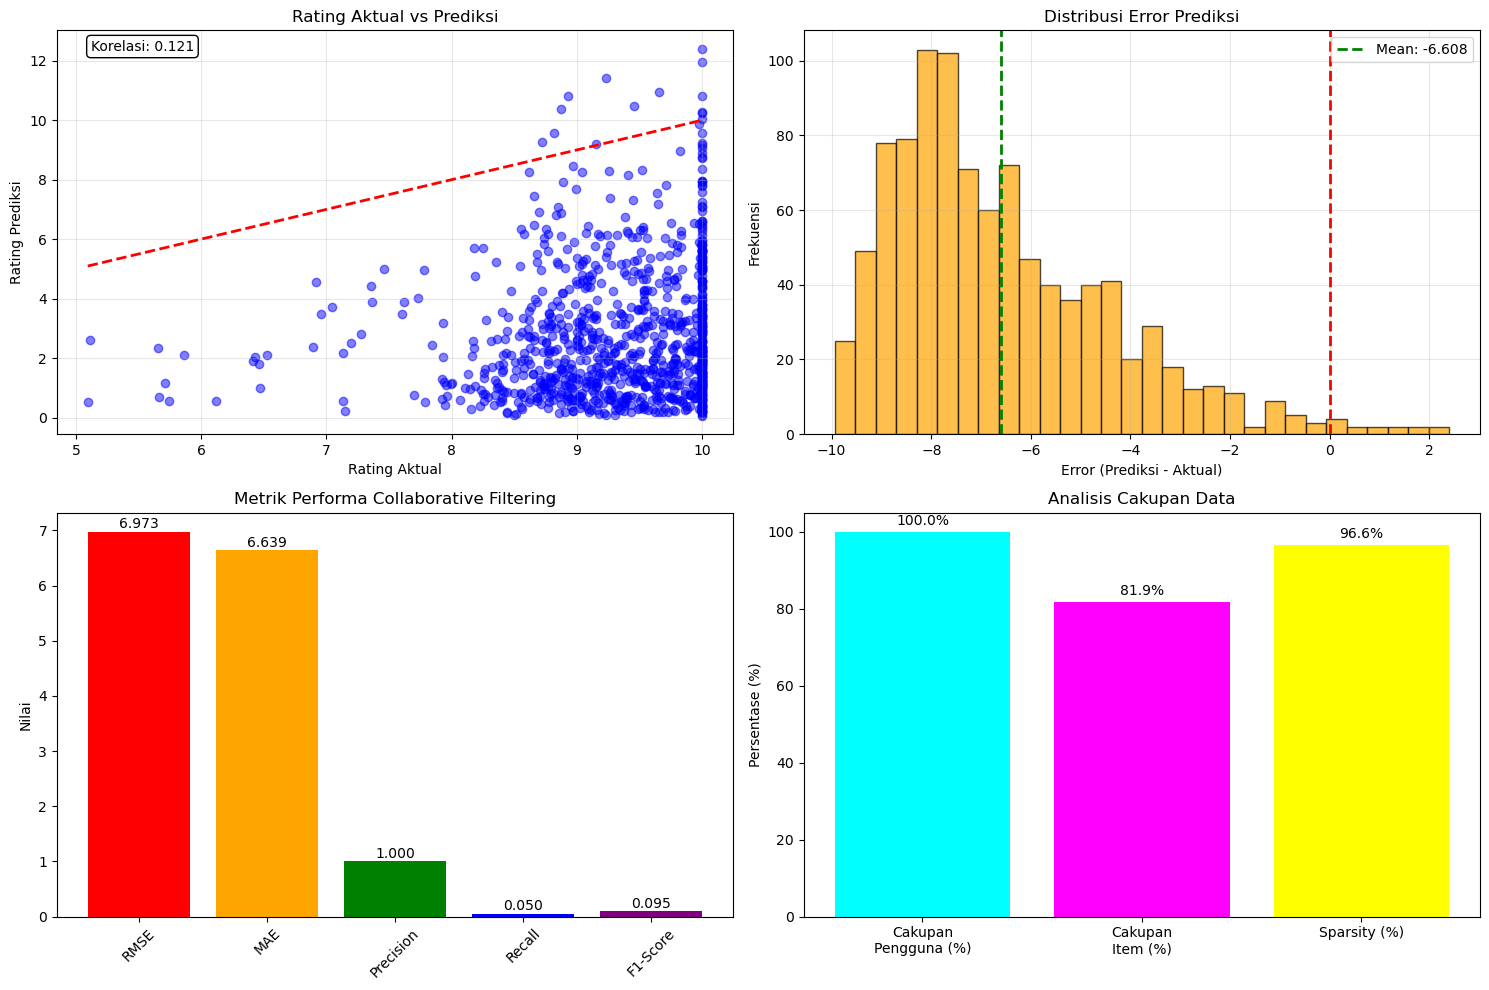

In [23]:
### 6.2 Evaluasi Collaborative Filtering

print("\n===== EVALUASI COLLABORATIVE FILTERING =====\n")

# Metrik evaluasi untuk Collaborative Filtering (sudah ada di kode sebelumnya, tambahkan lebih detail)
def evaluate_collaborative_filtering_detailed():
    """
    Evaluasi detail model Collaborative Filtering
    """
    print("Mengevaluasi performa Collaborative Filtering...")
    
    # Gunakan data yang sudah ada dari evaluasi sebelumnya
    rmse, mae, actual_ratings, predicted_ratings_list = evaluate_collaborative_filtering()
    
    # 1. Precision dan Recall (threshold-based)
    threshold = 7.0  # Rating di atas 7 dianggap "relevan"
    
    actual_relevant = [1 if r >= threshold else 0 for r in actual_ratings]
    predicted_relevant = [1 if r >= threshold else 0 for r in predicted_ratings_list]
    
    true_positives = sum(1 for a, p in zip(actual_relevant, predicted_relevant) if a == 1 and p == 1)
    false_positives = sum(1 for a, p in zip(actual_relevant, predicted_relevant) if a == 0 and p == 1)
    false_negatives = sum(1 for a, p in zip(actual_relevant, predicted_relevant) if a == 1 and p == 0)
    
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Precision (threshold = {threshold}): {precision:.4f}")
    print(f"Recall (threshold = {threshold}): {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    
    # 2. Evaluasi Coverage
    unique_users_with_recs = len(predicted_ratings_df.index)
    unique_items_recommended = len(predicted_ratings_df.columns)
    
    user_coverage = unique_users_with_recs / len(ratings_df['user_id'].unique()) * 100
    item_coverage = unique_items_recommended / len(df) * 100
    
    print(f"Cakupan Pengguna: {user_coverage:.2f}%")
    print(f"Cakupan Item: {item_coverage:.2f}%")
    
    # 3. Evaluasi Sparsity
    total_possible_ratings = len(ratings_df['user_id'].unique()) * len(df)
    actual_ratings_count = len(ratings_df)
    sparsity = (1 - actual_ratings_count / total_possible_ratings) * 100
    
    print(f"Tingkat Sparsity Data: {sparsity:.2f}%")
    
    # 4. Analisis Error Distribution
    errors = np.array(predicted_ratings_list) - np.array(actual_ratings)
    mae_calculated = np.mean(np.abs(errors))
    rmse_calculated = np.sqrt(np.mean(errors**2))
    
    print(f"MAE (dihitung ulang): {mae_calculated:.4f}")
    print(f"RMSE (dihitung ulang): {rmse_calculated:.4f}")
    
    return {
        'rmse': rmse,
        'mae': mae,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'user_coverage': user_coverage,
        'item_coverage': item_coverage,
        'sparsity': sparsity,
        'errors': errors
    }

# Jalankan evaluasi Collaborative Filtering
cf_metrics = evaluate_collaborative_filtering_detailed()

# Visualisasi hasil evaluasi Collaborative Filtering
def visualize_collaborative_filtering_evaluation():
    """
    Visualisasi hasil evaluasi Collaborative Filtering
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Actual vs Predicted Ratings (sudah ada, tapi kita buat ulang untuk konsistensi)
    rmse, mae, actual_ratings, predicted_ratings_list = evaluate_collaborative_filtering()
    
    axes[0, 0].scatter(actual_ratings, predicted_ratings_list, alpha=0.5, color='blue')
    axes[0, 0].plot([min(actual_ratings), max(actual_ratings)], 
                   [min(actual_ratings), max(actual_ratings)], 'r--', linewidth=2)
    axes[0, 0].set_xlabel('Rating Aktual')
    axes[0, 0].set_ylabel('Rating Prediksi')
    axes[0, 0].set_title('Rating Aktual vs Prediksi')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Tambahkan korelasi
    correlation = np.corrcoef(actual_ratings, predicted_ratings_list)[0, 1]
    axes[0, 0].text(0.05, 0.95, f'Korelasi: {correlation:.3f}', 
                   transform=axes[0, 0].transAxes, bbox=dict(boxstyle="round", facecolor='white'))
    
    # 2. Error Distribution
    errors = cf_metrics['errors']
    axes[0, 1].hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
    axes[0, 1].axvline(x=np.mean(errors), color='green', linestyle='--', linewidth=2, label=f'Mean: {np.mean(errors):.3f}')
    axes[0, 1].set_xlabel('Error (Prediksi - Aktual)')
    axes[0, 1].set_ylabel('Frekuensi')
    axes[0, 1].set_title('Distribusi Error Prediksi')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # 3. Metrik Performa
    metric_names = ['RMSE', 'MAE', 'Precision', 'Recall', 'F1-Score']
    metric_values = [cf_metrics['rmse'], cf_metrics['mae'], cf_metrics['precision'], 
                    cf_metrics['recall'], cf_metrics['f1_score']]
    
    bars = axes[1, 0].bar(metric_names, metric_values, color=['red', 'orange', 'green', 'blue', 'purple'])
    axes[1, 0].set_title('Metrik Performa Collaborative Filtering')
    axes[1, 0].set_ylabel('Nilai')
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Tambahkan nilai di atas bar
    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                       f'{value:.3f}', ha='center', va='bottom')
    
    # 4. Coverage Analysis
    coverage_names = ['Cakupan\nPengguna (%)', 'Cakupan\nItem (%)', 'Sparsity (%)']
    coverage_values = [cf_metrics['user_coverage'], cf_metrics['item_coverage'], cf_metrics['sparsity']]
    
    bars = axes[1, 1].bar(coverage_names, coverage_values, color=['cyan', 'magenta', 'yellow'])
    axes[1, 1].set_title('Analisis Cakupan Data')
    axes[1, 1].set_ylabel('Persentase (%)')
    
    # Tambahkan nilai di atas bar
    for bar, value in zip(bars, coverage_values):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                       f'{value:.1f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

visualize_collaborative_filtering_evaluation()


## 7. Finalisasi 

Content Based Filtering memiliki performa yang baik.

**Aspek Positif**:

- Diversitas Genre Excellent: 6.10 genre per rekomendasi (dari ~16 genre total) menunjukkan variasi yang sangat baik
- Cakupan Genre Tinggi: 81.25% coverage menunjukkan sistem tidak bias pada genre tertentu
- Kualitas Rekomendasi Tinggi: Rating rata-rata 9.56 dengan standar deviasi rendah (0.31) menunjukkan konsistensi kualitas tinggi